# Mounting Drive

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Unzipping zip file from drive

In [2]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/DATASETS/cell-images-for-detecting-malaria.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


#Plotting to visualize the data

##Single data plot

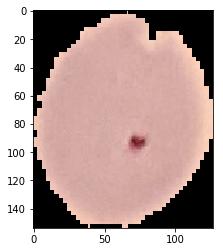

In [3]:
import matplotlib.pyplot as plt
im = plt.imread('/content/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png')
plt.imshow(im)
plt.show()

##Multiple random data plot

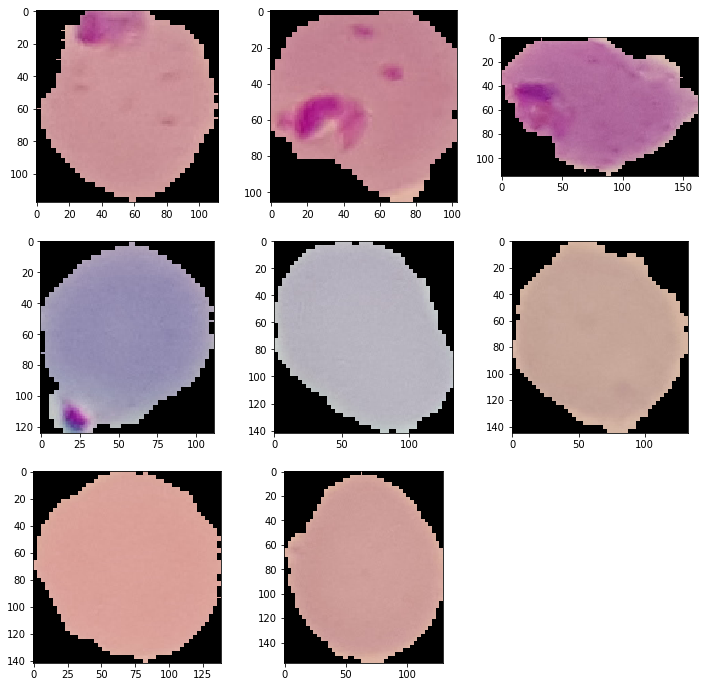

In [4]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #The image module supports basic image loading, rescaling and display operations.

train_parasitized_fnames = os.listdir("/content/cell_images/Parasitized")
train_uninfected_fnames = os.listdir("/content/cell_images/Uninfected")
nrows = 3
ncols = 3
pic_index = 0
pic_index += 4
next_para_pix = [os.path.join("/content/cell_images/Parasitized", fname)
               for fname in train_parasitized_fnames[pic_index-4:pic_index]]
next_un_pix = [os.path.join("/content/cell_images/Uninfected", fname)
               for fname in train_uninfected_fnames[pic_index-4:pic_index]]
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
for i, img_path in enumerate(next_para_pix+next_un_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Installing Split Folders

In [5]:
pip install split-folders

## Splitting data with a ratio of 80% and 20%

In [6]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
import split_folders
split_folders.ratio("/content/cell_images", output="output", seed=1337, ratio=(.8, .2)) # default values

Copying files: 27560 files [00:07, 3621.51 files/s]


# Data Pre-Processing using Image Data Generator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        "/content/output/train", 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=150,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        "/content/output/val",
        target_size=(150, 150),
        batch_size=100,
        class_mode='binary')

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


# Creating a CNN Model

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

W0715 12:34:52.104963 139904497846144 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Compiling the created model

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adadelta

model.compile(loss='binary_crossentropy',
             optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
             metrics=['acc'])

W0715 12:34:52.469549 139904497846144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


##Checking Accuracy of the model

In [0]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=200,  # 2000 images = batch_size * steps
     epochs=15,
     validation_data=validation_generator,
     validation_steps=50,  # 1000 images = batch_size * steps
     verbose=2)


Epoch 1/15
100/100 - 17s - loss: 0.6936 - acc: 0.5285 - val_loss: 0.6569 - val_acc: 0.6040
Epoch 2/15
100/100 - 15s - loss: 0.6308 - acc: 0.6665 - val_loss: 0.4139 - val_acc: 0.8710
Epoch 3/15
100/100 - 14s - loss: 0.4123 - acc: 0.8350 - val_loss: 0.2166 - val_acc: 0.9290
Epoch 4/15
100/100 - 14s - loss: 0.2927 - acc: 0.8910 - val_loss: 0.1708 - val_acc: 0.9510
Epoch 5/15
100/100 - 14s - loss: 0.2749 - acc: 0.8985 - val_loss: 0.1786 - val_acc: 0.9590
Epoch 6/15
100/100 - 14s - loss: 0.2518 - acc: 0.9079 - val_loss: 0.1789 - val_acc: 0.9560
Epoch 7/15
100/100 - 15s - loss: 0.2658 - acc: 0.9115 - val_loss: 0.1580 - val_acc: 0.9560
Epoch 8/15
100/100 - 15s - loss: 0.2652 - acc: 0.9055 - val_loss: 0.1620 - val_acc: 0.9530
Epoch 9/15
100/100 - 14s - loss: 0.2339 - acc: 0.9180 - val_loss: 0.2087 - val_acc: 0.9570
Epoch 10/15
100/100 - 14s - loss: 0.2875 - acc: 0.9040 - val_loss: 0.1560 - val_acc: 0.9610
Epoch 11/15
100/100 - 14s - loss: 0.2432 - acc: 0.9160 - val_loss: 0.1579 - val_acc: 0.95

##Plotting the train and test accuracy

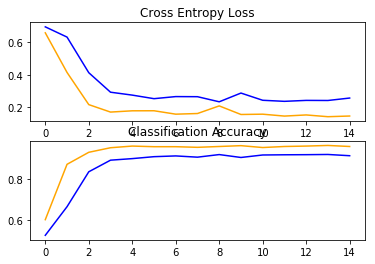

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

# Using Transfer Learning

## Using VGG16 Model

### Loading pre-trained model and weights

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

trained1_model = VGG16(include_top=False, 
                      weights="imagenet", 
                      input_shape=(150,150,3))

W0821 09:28:10.164329 140603955087232 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
trained1_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### Creating a model using VGG16 layers and few dense layers

In [0]:
from tensorflow.keras import Model,layers

for layer in trained1_model.layers:
    layer.trainable = False
    
last_layer = trained1_model.get_layer("block4_conv3")
output = last_layer.output

x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)

x = layers.Dropout(0.5)(x)
y = layers.Dense(1, activation='sigmoid')(x)

model = Model(trained1_model.input, y)


### Compiling model

In [11]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="binary_crossentropy",
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),
              metrics=['accuracy'])

W0821 09:28:26.039921 140603955087232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Checking accuracy

In [12]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=55,
      verbose=2)

Epoch 1/20
150/150 - 191s - loss: 0.3710 - acc: 0.8373 - val_loss: 0.2236 - val_acc: 0.9265
Epoch 2/20
150/150 - 170s - loss: 0.2732 - acc: 0.8964 - val_loss: 0.1809 - val_acc: 0.9364
Epoch 3/20
150/150 - 169s - loss: 0.2505 - acc: 0.9064 - val_loss: 0.1704 - val_acc: 0.9416
Epoch 4/20
150/150 - 167s - loss: 0.2449 - acc: 0.9105 - val_loss: 0.2059 - val_acc: 0.9227
Epoch 5/20
150/150 - 165s - loss: 0.2317 - acc: 0.9149 - val_loss: 0.1858 - val_acc: 0.9318
Epoch 6/20
150/150 - 165s - loss: 0.2378 - acc: 0.9121 - val_loss: 0.1606 - val_acc: 0.9416
Epoch 7/20
150/150 - 165s - loss: 0.2305 - acc: 0.9154 - val_loss: 0.1687 - val_acc: 0.9384
Epoch 8/20
150/150 - 166s - loss: 0.2288 - acc: 0.9159 - val_loss: 0.1575 - val_acc: 0.9424
Epoch 9/20
150/150 - 164s - loss: 0.2295 - acc: 0.9163 - val_loss: 0.1549 - val_acc: 0.9444
Epoch 10/20
150/150 - 164s - loss: 0.2268 - acc: 0.9194 - val_loss: 0.1747 - val_acc: 0.9351
Epoch 11/20
150/150 - 164s - loss: 0.2243 - acc: 0.9177 - val_loss: 0.1499 - va

### Plotting train and test accuracy

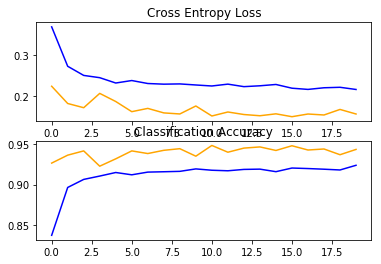

In [13]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(X.history['loss'], color='blue', label='train')
pyplot.plot(X.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(X.history['acc'], color='blue', label='train')
pyplot.plot(X.history['val_acc'], color='orange', label='test')
pyplot.show()

##Fine-Tuning the model

In [0]:
flag = False

for layer in trained1_model.layers:
  if flag:
    layer.trainable = True
  if layer.name == 'block4_conv1':
    flag = True

### Compiling the model

In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="binary_crossentropy",
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),
              metrics=['accuracy'])

### Checking accuracy after Fine-Tuning

In [16]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=55,
      verbose=2)

Epoch 1/20
150/150 - 194s - loss: 1.5435 - acc: 0.5761 - val_loss: 0.4767 - val_acc: 0.8264
Epoch 2/20
150/150 - 183s - loss: 0.3833 - acc: 0.8462 - val_loss: 0.2064 - val_acc: 0.9451
Epoch 3/20
150/150 - 179s - loss: 0.2664 - acc: 0.9075 - val_loss: 0.1651 - val_acc: 0.9445
Epoch 4/20
150/150 - 177s - loss: 0.2482 - acc: 0.9152 - val_loss: 0.1617 - val_acc: 0.9436
Epoch 5/20
150/150 - 176s - loss: 0.2404 - acc: 0.9181 - val_loss: 0.1527 - val_acc: 0.9513
Epoch 6/20
150/150 - 175s - loss: 0.2406 - acc: 0.9162 - val_loss: 0.1464 - val_acc: 0.9522
Epoch 7/20
150/150 - 175s - loss: 0.2280 - acc: 0.9218 - val_loss: 0.1430 - val_acc: 0.9522
Epoch 8/20
150/150 - 175s - loss: 0.2263 - acc: 0.9244 - val_loss: 0.1396 - val_acc: 0.9538
Epoch 9/20
150/150 - 172s - loss: 0.2207 - acc: 0.9232 - val_loss: 0.1379 - val_acc: 0.9547
Epoch 10/20
150/150 - 174s - loss: 0.2197 - acc: 0.9248 - val_loss: 0.1363 - val_acc: 0.9558
Epoch 11/20
150/150 - 178s - loss: 0.2144 - acc: 0.9261 - val_loss: 0.1439 - va

### Plotting train and test accuracy after fine-tuning

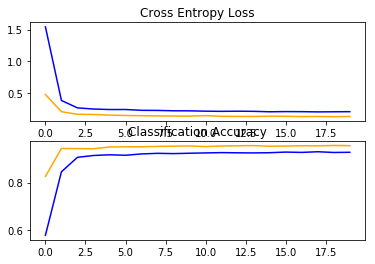

In [17]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(X.history['loss'], color='blue', label='train')
pyplot.plot(X.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(X.history['acc'], color='blue', label='train')
pyplot.plot(X.history['val_acc'], color='orange', label='test')
pyplot.show()